In [4]:
import numpy as np


perch_length  =  np.array ([ 8.4 , 13.7 , 15.0 , 16.2 , 17.4 , 18.0 , 18.7 , 19.0 , 19.6 , 20.0 , 21.0 ,
       21.0 , 21.0 , 21.3 , 22.0 , 22.0 , 22.0 , 22.0 , 22.0 , 22.5 , 22.5 , 22.7 ,
       23.0 , 23.5 , 24.0 , 24.0 , 24.6 , 25.0 , 25.6 , 26.5 , 27.3 , 27.5 , 27.5 ,
       27.5 , 28.0 , 28.7 , 30.0 , 32.8 , 34.5 , 35.0 , 36.5 , 36.0 , 37.0 , 37.0 ,
       39.0 , 39.0 , 39.0 , 40.0 , 40.0 , 40.0 , 40.0 , 42.0 , 43.0 , 43.0 , 43.5 ,
       44.0 ])
perch_weight  =  np.array ([ 5.9 , 32.0 , 40.0 , 51.5 , 70.0 , 100.0 , 78.0 , 80.0 , 85.0 , 85.0 , 110.0 ,
       115.0 , 125.0 , 130.0 , 120.0 , 120.0 , 130.0 , 135.0 , 110.0 , 130.0 ,
       150.0 , 145.0 , 150.0 , 170.0 , 225.0 , 145.0 , 188.0 , 180.0 , 197.0 ,
       218.0 , 300.0 , 260.0 , 265.0 , 250.0 , 250.0 , 300.0 , 320.0 , 514.0 ,
       556.0 , 840.0 , 685.0 , 700.0 , 700.0 , 690.0 , 900.0 , 650.0 , 820.0 ,
       850.0 , 900.0 , 1015.0 , 820.0 , 1100.0 , 1000.0 , 1100.0 , 1000.0 ,
       1000.0 ])

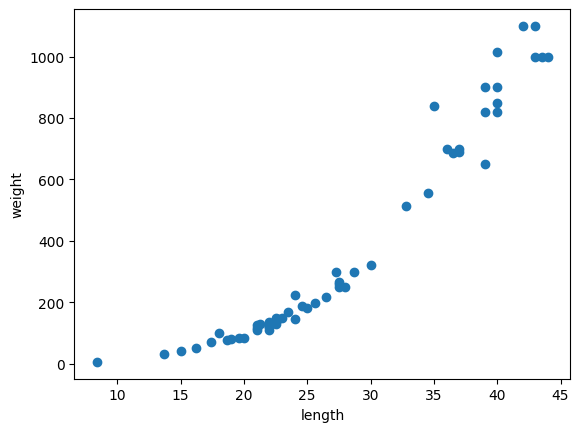

In [5]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [10]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [11]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [15]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)



# 결정계수


In [16]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [17]:
print(knr.score(test_input, test_target))

0.992809406101064


In [18]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_predicition = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_predicition)
print(mae)

19.157142857142862


In [21]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [22]:
# 이웃의 개수를 3으로 설정합니다.
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [23]:
print(knr.score(test_input, test_target))

0.9746459963987609


# 문제 2번 솔루션

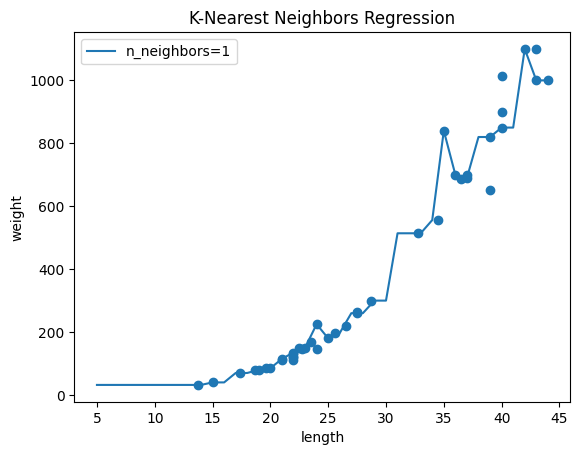

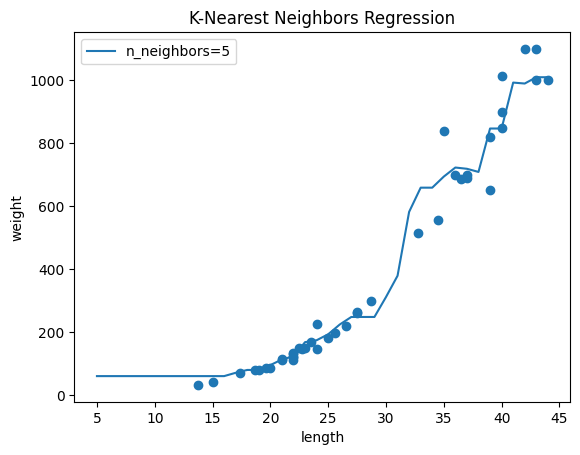

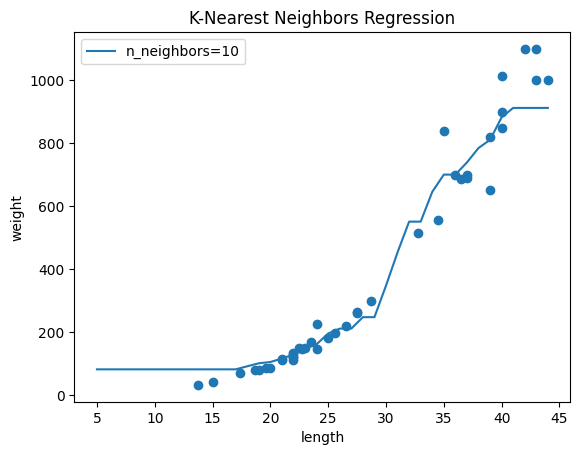

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Create k-nearest neighbors regression object
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델을 훈련합니다.
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    # 지정한 범위 x에 대한 예측을 구합니다.
    prediction = knr.predict(x)

    # 훈련 세트와 예측 결과를 그래프로 그립니다.
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction, label=f'n_neighbors={n}')
    plt.title('K-Nearest Neighbors Regression')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend()
    plt.show()

